# National Stock Exchange(NSE) Analysis Report 

## Date:-  23 / 02 / 2019
## NAME: Shubham Kumar <br> PRN: 18030142032


<br><br><br><br><br><br>

### The National Stock Exchange of India Limited (NSE) is the leading stock exchange, established in 1992 as the first demutualized electronic exchange in the country. NSE was the first exchange to provide a modern, fully automated screen-based electronic trading system which offered easy trading facility to the investors.

#### The NSE Data has being provided by "Yahoo Finance" from 17th September, 2007. We're selecting data from 01st October, 2007 to the current system date.  The data has been provided by Yahoo and is generated by packages "QUANTMOD" available in R.  The 'quantmod' package is designed to assist the quantitative trader in the development, testing, and deployment of statistically based trading models.<br> For Example:- 

In [1]:
library(quantmod)
getSymbols("^NSEI",from=c("2007-06-01"),to=c(Sys.Date()),adjust=TRUE)
head(NSEI)
tail(NSEI)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).
Warning message:
“^NSEI contains missing values. Some functions will not work if objects contain missing values in the middle of th

[1] "NSEI"

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2007-09-17   4518.45   4549.05  4482.85    4494.65           0       4494.65
2007-09-18   4494.10   4551.80  4481.55    4546.20           0       4546.20
2007-09-19   4550.25   4739.00  4550.25    4732.35           0       4732.35
2007-09-20   4734.85   4760.85  4721.15    4747.55           0       4747.55
2007-09-21   4752.95   4855.70  4733.70    4837.55           0       4837.55
2007-09-24   4837.15   4941.15  4837.15    4932.20           0       4932.20

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2019-02-25  10813.25  10887.10 10788.05   10880.10      374300      10880.10
2019-02-26  10775.30  10888.75 10729.30   10835.30      402600      10835.30
2019-02-27  10881.20  10939.70 10751.20   10806.65      369700      10806.65
2019-02-28  10865.70  10865.70 10784.85   10792.50      624900      10792.50
2019-03-01  10842.65  10877.90 10823.10   10863.50      299200      10863.50
2019-03-05  10864.85  10994.90 10817.00   10987.45      362000      10987.45

#### From the above example, we conclude that the data is beign provided from 17th, September, 2007 to till date. We're choosing data from 1st October, 2007 to till date.
<br><br><br>

### We're selecting the "Date" column and the "NSEI.Close" column. The basis of our selection is as follows:- <br> 1. The data is available from September 2007. So, we're selecting the whole month data from the next month. <br> 2. The Stock for the opening for the previous date is same as the todays closing date. And we're going to predict which company will perform well on the next day.

### We're going to implement 'Apriori Algorithm' which is an Association Rule Learning Algoroithm of Unsupervised Machine Learning Technique. 
####  We cannot judge upcoming NSE Prices for tomorrow. This is an Unsupervised case. <br>Unsupervised learning is the training of  algorithm using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance. The Unsupervised Learning is further classified into two categories:- <br>1. Clusturing <br> 2. Association Rule Learning

### We're selecting Association Rule Learning of Unsupervised Learning. 
#### Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. It is intended to identify strong rules discovered in databases using some measures of interestingness. Here, the NSEI.Close(yesterday) price is same as NSEI.Open(today) prices for the companies.

### The preferred algorithm for the Association Rule Learning are: <br>1. Apriori <br>2. ECLAT <br>3. FP Growth<br><br>We're selecting Apriori Algorithm. This algorithm is used for mining frequent itemsets and relevant association rules. We can use other algorithm such as ECLAT which is same as Apriori but it's used for mining transactional itemsets which are smaller and FP Growth which is used to  find frequent sets of things that commonly occur together. <br>Here, the itemsets are huge,i.e., approx. 12 years data.

### The other Application of Apriori Algorithm in Market Analysis and Management and Corporate Analysis and Risk Management are :- <br> 1. Customer Profiling <br> 2. Identifying Customer Requirements <br> 3. Cross Market Analysis <br> 4. Target Marketing <br> 5. Providing Summary Information <br> 6. Finance Planning and Asset Evaluation <br> 7. Resource Planning

### <br><br><br><br> We're going to represent the analysis report in pictorial format in the same Jupyter Notebook file.

##### Importing Necessary Libraries

In [2]:
library(lubridate) # for time analysis
library(ggplot2) # for visualization
library(quantmod) # for getting NSE data from Yahoo
library(reshape2) #
library(RColorBrewer) # for visualization
library(arules) # for association rule mining
# library(dplyr) #
library(arulesViz) # for association rule visualization
library(colorspace) # for selecting individual colors 
library(repr) # for visualization


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write

Loading required package: grid


##### Getting Dataset of NSE India through getSymbols() method of quantmod package. 

In [3]:
START=c("2007-10-01")
END=c(Sys.Date())
getSymbols("^NSEI",from=START,to=END,adjust=TRUE)

Warning message:
“^NSEI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”

[1] "NSEI"

##### Representation and Summarization of NSE India DataSet.

In [4]:
head(NSEI);tail(NSEI)

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2007-10-01   5021.50   5089.30  5001.35    5068.95           0       5068.95
2007-10-03   5069.00   5261.35  5034.15    5210.80           0       5210.80
2007-10-04   5211.65   5233.10  5126.05    5208.65           0       5208.65
2007-10-05   5208.15   5248.55  5164.50    5185.85           0       5185.85
2007-10-08   5186.25   5249.30  5024.75    5085.10           0       5085.10
2007-10-09   5062.65   5348.70  5000.95    5327.25           0       5327.25

           NSEI.Open NSEI.High NSEI.Low NSEI.Close NSEI.Volume NSEI.Adjusted
2019-02-25  10813.25  10887.10 10788.05   10880.10      374300      10880.10
2019-02-26  10775.30  10888.75 10729.30   10835.30      402600      10835.30
2019-02-27  10881.20  10939.70 10751.20   10806.65      369700      10806.65
2019-02-28  10865.70  10865.70 10784.85   10792.50      624900      10792.50
2019-03-01  10842.65  10877.90 10823.10   10863.50      299200      10863.50
2019-03-05  10864.85  10994.90 10817.00   10987.45      362000      10987.45

In [5]:
summary(NSEI)

     Index              NSEI.Open       NSEI.High        NSEI.Low    
 Min.   :2007-10-01   Min.   : 2554   Min.   : 2585   Min.   : 2253  
 1st Qu.:2010-08-13   1st Qu.: 5216   1st Qu.: 5256   1st Qu.: 5170  
 Median :2013-06-14   Median : 6036   Median : 6070   Median : 5985  
 Mean   :2013-06-18   Mean   : 6829   Mean   : 6871   Mean   : 6777  
 3rd Qu.:2016-04-29   3rd Qu.: 8440   3rd Qu.: 8481   3rd Qu.: 8394  
 Max.   :2019-03-05   Max.   :11752   Max.   :11760   Max.   :11710  
                      NA's   :26      NA's   :26      NA's   :26     
   NSEI.Close     NSEI.Volume     NSEI.Adjusted  
 Min.   : 2524   Min.   :     0   Min.   : 2524  
 1st Qu.: 5216   1st Qu.:     0   1st Qu.: 5216  
 Median : 6027   Median :116900   Median : 6027  
 Mean   : 6825   Mean   :103537   Mean   : 6825  
 3rd Qu.: 8437   3rd Qu.:182250   3rd Qu.: 8437  
 Max.   :11738   Max.   :719000   Max.   :11738  
 NA's   :26      NA's   :26       NA's   :26     

The Graph given below shows the up and down of NSE from October 2007 to till Date.
The Stock Market was on peek at the end of 2018.

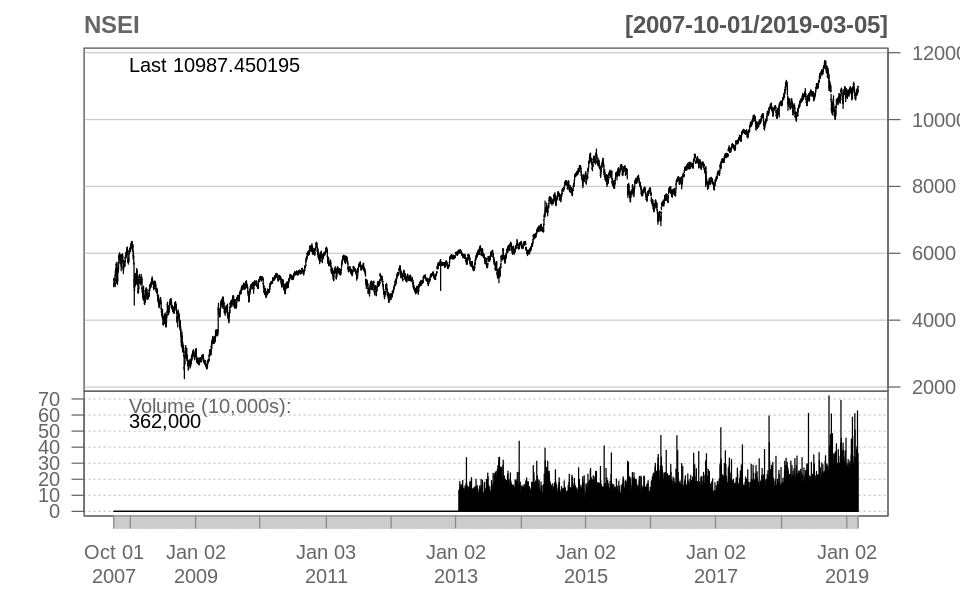

In [6]:
options(repr.plot.width=8, repr.plot.height=5)
barChart(NSEI,theme='white.mono',bar.type='hlc') 

<br><br><br><br>

##### Getting top 50 Companies List on Date :- 23 / 02 / 2019 from the given URL
##### https://www.nseindia.com/live_market/dynaContent/live_watch/equities_stock_watch.htm

In [7]:
companies_50=c( 'IOC.NS','HINDPETRO.NS','JSWSTEEL.NS','BPCL.NS','VEDL.NS','TATAMOTORS.NS','YESBANK.NS','NTPC.NS','M&M.NS',
'MARUTI.NS','DRREDDY.NS','HCLTECH.NS','HEROMOTOCO.NS','GRASIM.NS','BHARTIARTL.NS','HINDALCO.NS','ONGC.NS','WIPRO.NS',
'SBIN.NS','EICHERMOT.NS','TCS.NS','HINDUNILVR.NS','AXISBANK.NS','TATASTEEL.NS','COALINDIA.NS','TECHM.NS','BAJAJFINSV.NS',
'INFRATEL.NS','ZEEL.NS','INFY.NS','ICICIBANK.NS','UPL.NS','BAJAJ-AUTO.NS','ITC.NS','POWERGRID.NS','SUNPHARMA.NS',
'TITAN.NS','HDFC.NS','LT.NS','IBULHSGFIN.NS','ULTRACEMCO.NS','ADANIPORTS.NS','INDUSINDBK.NS','ASIANPAINT.NS','CIPLA.NS',
'BAJFINANCE.NS','HDFCBANK.NS','RELIANCE.NS','GAIL.NS','KOTAKBANK.NS')

<br><br><br><br>
# Data cleaning and Manipulations 

In [8]:
# Selecting Closing Price from October, 2007.
nse <- (Cl(get("NSEI"))) # Getting Closing Stock Price
head(nse)

           NSEI.Close
2007-10-01    5068.95
2007-10-03    5210.80
2007-10-04    5208.65
2007-10-05    5185.85
2007-10-08    5085.10
2007-10-09    5327.25

In [9]:
# The data received is of type double
# Converting the data into dataframe and adding Date Column in that dataframe
nse <- data.frame(Date=as.POSIXct(index(nse)), nse) 
head(nse);tail(nse)

,Date,NSEI.Close
2007-10-01,2007-10-01 05:30:00,5068.95
2007-10-03,2007-10-03 05:30:00,5210.80
2007-10-04,2007-10-04 05:30:00,5208.65
2007-10-05,2007-10-05 05:30:00,5185.85
2007-10-08,2007-10-08 05:30:00,5085.10
2007-10-09,2007-10-09 05:30:00,5327.25


,Date,NSEI.Close
2019-02-25,2019-02-25 05:30:00,10880.10
2019-02-26,2019-02-26 05:30:00,10835.30
2019-02-27,2019-02-27 05:30:00,10806.65
2019-02-28,2019-02-28 05:30:00,10792.50
2019-03-01,2019-03-01 05:30:00,10863.50
2019-03-05,2019-03-05 05:30:00,10987.45


In [10]:
# The added data in Date column are in timestamp format.
# Converting the timestamp to Date in Date Column.
nse$Date= as.Date(nse$Date)
head(nse);tail(nse)

,Date,NSEI.Close
2007-10-01,2007-10-01,5068.95
2007-10-03,2007-10-03,5210.80
2007-10-04,2007-10-04,5208.65
2007-10-05,2007-10-05,5185.85
2007-10-08,2007-10-08,5085.10
2007-10-09,2007-10-09,5327.25


,Date,NSEI.Close
2019-02-25,2019-02-25,10880.10
2019-02-26,2019-02-26,10835.30
2019-02-27,2019-02-27,10806.65
2019-02-28,2019-02-28,10792.50
2019-03-01,2019-03-01,10863.50
2019-03-05,2019-03-05,10987.45


In [11]:
# Removing unwanted index and setting Date Column as Primary Index Column 
rownames(nse)=NULL
head(nse)

Date,NSEI.Close
2007-10-01,5068.95
2007-10-03,5210.80
2007-10-04,5208.65
2007-10-05,5185.85
2007-10-08,5085.10
2007-10-09,5327.25


In [12]:
# Changing NSEI.Close Column name to Nifty
colnames(nse)[2]="Nifty"
head(nse)

Date,Nifty
2007-10-01,5068.95
2007-10-03,5210.80
2007-10-04,5208.65
2007-10-05,5185.85
2007-10-08,5085.10
2007-10-09,5327.25


## Getting the Closing Price for Top 50 Companies listed above 

In [ ]:
getSymbols(companies_50[1:length(companies_50)],from=START,to=END,adjust=TRUE)

Warning message:
“IOC.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”Warning message:
“HINDPETRO.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”Warning message:
“JSWSTEEL.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”Warning message:
“BPCL.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”Warning message:
“VEDL.NS contains missing values. Some functions will not work if objects conta

In [ ]:
# getting the price for each company
price <- (Cl(get(companies_50[1])))
for(i in 2:length(companies_50))
    price <- merge(price,(Cl(get(companies_50[i]))))

In [ ]:
# Renaming the Columns Name from X.Close to X.NS. Here X is company name
colnames(price) <- companies_50

In [ ]:
head(price)

In [ ]:
# Converting type price to dataframe and removing .NS from column name 
df <- data.frame(Date=as.POSIXct(index(price)), price)
df$Date= as.Date(df$Date)
colnames(df)=gsub(".NS","",colnames(df))
rownames(df)=NULL
head(df)

In [ ]:
# Merging NSE dataframe with all companies dataframe 
df2=merge(nse,df,id="Date")
head(df2)

# <br><br><br> Implementing Apriori Algorithm on the NSE India DataSet

### The data required for Apriori must be in the following basket format:

In [ ]:
# Removing Date Column and storing it into dff
dff=df2[,-1]
head(dff)

#### The basket format must have first column as a unique identifier of each transaction, something like a unique receipt number. Here, the total Score of Nifty will be the unique Identifier for each companies prices. The next columns consists of the items which are corresponding to Nifty.

In [ ]:
# lag - Compute a lagged(delay) version of a time series, 
#       shifting the time base back by a given number of observations.
# lag{quantmod} - Creating a lagged series from data, with NA used to fill.
dt=apply(dff,2,function(x) {x-lag(x)})

# Converting each column value to 0 and 1.
dtt=apply(dt,2,function(x) {ifelse(x>0,1,0)})
dtt=data.frame(dtt)

# Combining df2 dataframe 1st column with dtt and removing NA valued Columns
df3=cbind(df2[,1],dtt)
df3=df3[-1,]
colnames(df3)[1]="Date"

# Removing the Date Column and storing other data in df4
df4=df3[,-1]

# Getting the Factor value for the df4 dataframe for each 
df5=apply(df4,2,function(x) {as.factor(as.character(x))})

# Converting to dataframe for applying transaction from 'arules'
df5=data.frame(df5)

In [ ]:
# Converting dataframe to transaction form and storing it into dd variable.
# It stores transactions in sparse matrix.
dd <- as(df5, "transactions")
dd

### Applyling Apriori Algorithm on the transactional dataset

In [ ]:
rules <- apriori(dd,
                 parameter = list(support=0.01,
                                  confidence=0.25,
                                  minlen=2,
                                  maxlen=3,
                                  target='rules' # to mine for rules
                                  ))

We have used support and confidence in parameter list.

<b>Support</b>: Support is the basic probability of an event to occur. If we have an event to buy product A, Support(A) is the number of transactions which includes A divided by total number of transactions.

<b>Confidence</b>: The confidence of an event is the conditional probability of the occurrence; the chances of A happening given B has already happened.

<b>Lift</b>: This is the ratio of confidence to expected confidence.The probability of all of the items in a rule occurring together (otherwise known as the support) divided by the product of the probabilities of the items on the left and right side occurring as if there was no association between them.

<i>The lift value tells us how much better a rule is at predicting something than randomly guessing. The higher the lift, the stronger the association.</i>


Anassociation rule is of the form A ‐> B ,where A is called the left hand side of the rule and B is called the right hand side of the rule.

In [ ]:
# The top 10 rules arranged by lift.
inspect(rules[1:10])

In [ ]:
inspect(sort(rules, by='lift', decreasing = T)[1:5])

# Interpretations and Analysis

### The histograms depict how many times an item has occurred in our dataset as compared to the others.

In [ ]:
options(repr.plot.width=18, repr.plot.height=8)
itemFrequencyPlot(dd,topN=50,col=brewer.pal(8,'Pastel2'),main='Relative Item Frequency Plot',
                  type="relative",ylab="Item Frequency (Relative)")

### The confidence levels are plotted on the Y axis and Support levels on the X axis for each rule.

In [ ]:
options(repr.plot.width=12, repr.plot.height=6)
plot(rules)

In [ ]:
options(repr.plot.width=5, repr.plot.height=10)
plot(rules, method = "grouped", control = list(k = 5))

### The size of graph nodes is based on support levels and the colour on lift ratios. The incoming lines show the Antecedants or the LHS and the RHS is represented by names of items. 

In [ ]:
# The graph shows the lift Ratios for each.
options(repr.plot.width=22, repr.plot.height=16)
plot(head(sort(rules, by="lift"), 50),method="graph", control=list(cex=1.5))

In [ ]:
# The graph shows the support Ratios for each 
options(repr.plot.width=18, repr.plot.height=10)
plot(head(sort(rules, by="support"), 50),method="graph",shading = "lift", control=list(cex=1.5))

In [ ]:
# The graph shows the Confidence Ratios for each
options(repr.plot.width=20, repr.plot.height=16)
plot(head(sort(rules, by="confidence"),50),method="graph",shading = "lift", control=list(cex=1.5))

##### Applying Apriori for Tata Motors Prices

In [ ]:
# tata_rules<-apriori(data=dd, parameter=list(supp=0.01,conf = 0.25,minlen=2,maxlen=6), 
#                     appearance = list(default="lhs",rhs="TATAMOTORS=1"))

In [ ]:
# options(repr.plot.width=5, repr.plot.height=4)
# plot(tata_rules)

In [ ]:
# options(repr.plot.width=5, repr.plot.height=4)
# plot(tata_rules, method = "grouped", control = list(k = 5))

In [ ]:
# inspect(sort(tata_rules, by='lift', decreasing = T)[1:5])

In [ ]:
# # tata group company association line algorithm with TATAMOTORS
# # TATAMOTORS, TCS, TATASTEEL, TECHM, TITAN
# test1= subset(tata_rules, lhs %in% c("TATASTEEL=0","TATASTEEL=1","TATAMOTORS=0","TATAMOTORS=1"))
# inspect(sort(test1, by='lift', decreasing = T)[1:5])

In [ ]:
# # both TECHM and TCS are up, tatamotor is also up
# test2= subset(tata_rules, (lhs %in% "TCS=1")  & (lhs %in% "TECHM=1")  & (lhs %in% "TCS=1"))
# inspect(sort(test2, by='lift', decreasing = T)[1:5])